In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [ ]:
from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothicCoding'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
acc_zone = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/[D9&10] 데이터시각화 프로젝트/[D9&10] 데이터시각화 프로젝트_2조/Data/어린이 사고다발지역 ARI.csv', index_col = 0)


FileNotFoundError: ignored

In [ ]:
szone = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/[D9&10] 데이터시각화 프로젝트/[D9&10] 데이터시각화 프로젝트_2조/Data/서울시 어린이보호구역 CARI.csv', index_col=False)
szone_ver2 = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/[D9&10] 데이터시각화 프로젝트/[D9&10] 데이터시각화 프로젝트_2조/Data/스쿨존 CARI200-1000 (CARI만 참조).csv', index_col=False)
sacc_zone = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/[D9&10] 데이터시각화 프로젝트/[D9&10] 데이터시각화 프로젝트_2조/Data/스쿨존내어린이 사고다발지역정보 ARI.csv', index_col = 0)
acc_zone = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/[D9&10] 데이터시각화 프로젝트/[D9&10] 데이터시각화 프로젝트_2조/Data/어린이 사고다발지역 ARI.csv', index_col = 0)
illegal_parking = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/[D9&10] 데이터시각화 프로젝트/[D9&10] 데이터시각화 프로젝트_2조/Data/서울시 불법주정차 위반 단속 CCTV.csv', index_col = 0)
speed_bump = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/[D9&10] 데이터시각화 프로젝트/[D9&10] 데이터시각화 프로젝트_2조/Data/과속방지턱정보.csv', index_col = 0)

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
szone_ver2.head(1)

,index,행정구역,시설종류,대상시설명,위도,경도,CARI,CARI300,CARI200,CARI400,CARI500,불법주정차200,불법주정차300,불법주정차400,불법주정차500,과속방지턱200
0,0,노원구,초등학교,화랑초교,37.626918,127.093803,0.0,0.0,0.0,0.0,0.0,0,1,1,4,0


In [ ]:
# 두 점 사이 거리 비교

def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

In [ ]:
# 스쿨존다발지역 내 데이터 개수 구하기
def sacc_zone_count(sacc_zone_data, data, radius):
  cmr = []      # 결과값 담을 리스트
  for i in sacc_zone_data.itertuples(index=False):  # 결과값 담을 데이터프레임
    cmr_cnt = 0
    for row in data.itertuples(index=False): # 참고해서 가져올 데이터프레임 만약 스쿨존 개수를 세려면 스쿨존 데이터프레임

      d = haversine_distance(i.위도, i.경도, row.위도, row.경도)
      if d <= radius:        # 기준 거리 (1이면 1km 내 개수, 0.5면 500미터 내 개수)
        cmr_cnt += 1 
    cmr.append(np.round(cmr_cnt, 2))
  return(cmr)

In [ ]:
# 스쿨존 다발지역 내 스쿨존 개수
sacc_zone['스쿨존(200m)'] = sacc_zone_count(sacc_zone, szone, 0.2)
sacc_zone['스쿨존(300m)'] = sacc_zone_count(sacc_zone, szone, 0.3)
sacc_zone['스쿨존(400m)'] = sacc_zone_count(sacc_zone, szone, 0.4)

# 스쿨존 다발지역 내 불법주정차 위반 단속 개수
sacc_zone['불법주정차(200m)'] = sacc_zone_count(sacc_zone, illegal_parking, 0.2)
sacc_zone['불법주정차(300m)'] = sacc_zone_count(sacc_zone, illegal_parking, 0.3)
sacc_zone['불법주정차(400m)'] = sacc_zone_count(sacc_zone, illegal_parking, 0.4)

# 스쿨존 다발지역 내 과속방지턱 개수
sacc_zone['과속방지턱(200m)'] = sacc_zone_count(sacc_zone, speed_bump, 0.2)
sacc_zone['과속방지턱(300m)'] = sacc_zone_count(sacc_zone, speed_bump, 0.3)
sacc_zone['과속방지턱(400m)'] = sacc_zone_count(sacc_zone, speed_bump, 0.4)

In [ ]:
sacc_zone[['행정구역','지점명', '위도','경도', 'ARI',
           '스쿨존(200m)', '스쿨존(300m)', '스쿨존(400m)',
           '불법주정차(200m)', '불법주정차(300m)', '불법주정차(400m)', 
           '과속방지턱(200m)', '과속방지턱(300m)', '과속방지턱(400m)']]

,행정구역,지점명,위도,경도,ARI,스쿨존(200m),스쿨존(300m),스쿨존(400m),불법주정차(200m),불법주정차(300m),불법주정차(400m),과속방지턱(200m),과속방지턱(300m),과속방지턱(400m)
사고다발지FID,,,,,,,,,,,,,,
6141105,중랑구,서울특별시 중랑구 묵동(묵현초교 부근),37.608344,127.075014,0.60,2,3,3,1,2,2,0,0,0
6107962,성북구,서울특별시 성북구 장위동(장위초교 부근),37.611186,127.048284,0.60,1,3,3,2,4,6,5,10,20
6107948,도봉구,서울특별시 도봉구 창동(창원초교 부근),37.653416,127.041023,0.72,2,2,4,2,4,9,0,0,0
6139185,금천구,서울특별시 금천구 시흥동(문백초교 부근),37.449438,126.900058,0.28,1,2,3,1,1,4,19,24,37
6229749,종로구,서울특별시 종로구 숭인동(창신초교 부근),37.576610,127.015572,0.40,1,2,3,2,7,8,22,48,104
6230385,성북구,서울특별시 성북구 길음동(미아초교 부근),37.610749,127.022449,0.45,3,5,5,5,9,13,1,8,15
6229747,성북구,서울특별시 성북구 장위동(장위초교 부근),37.613425,127.050832,0.40,0,1,1,1,4,5,10,18,29
6230072,강북구,서울특별시 강북구 미아동(수유초교 부근),37.630477,127.020341,0.60,1,4,4,3,7,12,0,0,0
6229762,은평구,서울특별시 은평구 응암동(유진유치원 부근),37.587254,126.919442,0.45,0,1,5,3,5,9,41,93,124


In [ ]:
def show_scatter(sacc_zone_data, feature):
  corr_feature = sacc_zone_data[feature].corr()

  fig = plt.figure(figsize=(10,10))

  n_feature = len(feature)
  for i in range(n_feature):
      for j in range(n_feature):
          ax = fig.add_subplot(n_feature,n_feature,i*n_feature + j + 1)
          plt.scatter(feature[j], feature[i], data=sacc_zone_data, s=9)
          
          if i == n_feature-1:
              plt.xlabel(feature[j], fontsize=12)
          if j == 0:
              plt.ylabel(feature[i], fontsize=12)
          ax.annotate(np.round(corr_feature.loc[feature[i],feature[j]], 3), xy=(1, 0), 
                      xycoords='axes fraction', fontsize=16,
                      horizontalalignment='right', verticalalignment='bottom')

  plt.show()

In [ ]:
sacc_zone['스쿨존(200m)'].unique()

array([2, 1, 3, 0, 4])

In [ ]:
print('ARI 값 개수: ', len(sacc_zone['ARI'].unique()))
print('스쿨존(200m) 값 개수: ', len(sacc_zone['스쿨존(200m)'].unique()))
print('스쿨존(300m) 값 개수: ', len(sacc_zone['스쿨존(300m)'].unique()))
print('스쿨존(400m) 값 개수: ', len(sacc_zone['스쿨존(400m)'].unique()))

ARI 값 개수:  7
스쿨존(200m) 값 개수:  5
스쿨존(300m) 값 개수:  5
스쿨존(400m) 값 개수:  6


In [ ]:
sacc_zone.columns

Index(['연도', '법정동코드', '지점코드', '행정구역', '지점명', '발생건수', '사상자수', '사망자수', '중상자수',
       '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤', '지역', 'ARI', '스쿨존(200m)',
       '스쿨존(300m)', '스쿨존(400m)', '불법주정차(200m)', '불법주정차(300m)', '불법주정차(400m)',
       '과속방지턱(200m)', '과속방지턱(300m)', '과속방지턱(400m)'],
      dtype='object')

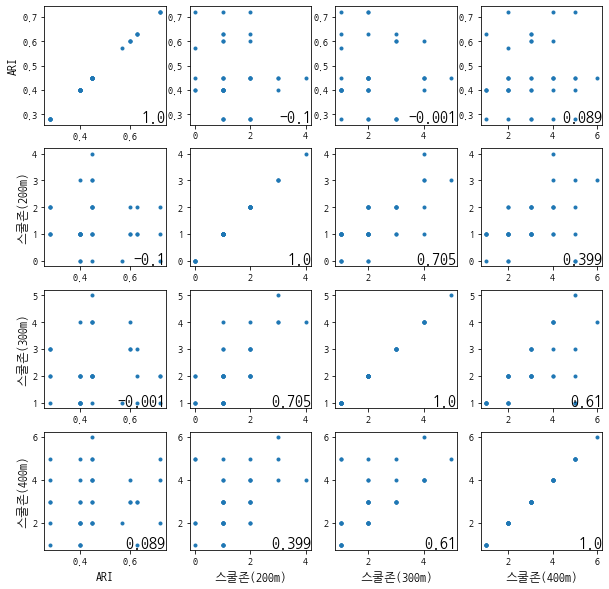

In [ ]:
feature = ['ARI', '스쿨존(200m)', '스쿨존(300m)', '스쿨존(400m)']
show_scatter(sacc_zone, feature)

In [ ]:
print('ARI 값 개수: ', len(sacc_zone['ARI'].unique()))
print('불법주정차(200m) 값 개수: ', len(sacc_zone['불법주정차(200m)'].unique()))
print('불법주정차(300m) 값 개수: ', len(sacc_zone['불법주정차(300m)'].unique()))
print('불법주정차(400m) 값 개수: ', len(sacc_zone['불법주정차(400m)'].unique()))

ARI 값 개수:  7
불법주정차(200m) 값 개수:  8
불법주정차(300m) 값 개수:  10
불법주정차(400m) 값 개수:  14


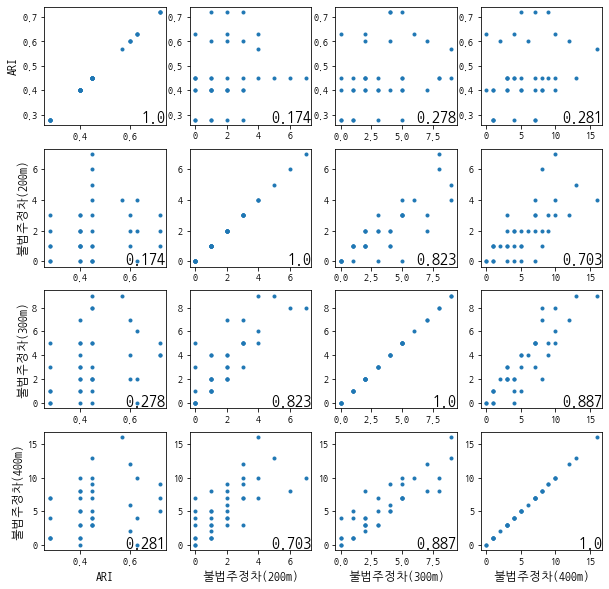

In [ ]:
feature = ['ARI', '불법주정차(200m)', '불법주정차(300m)', '불법주정차(400m)']
show_scatter(sacc_zone, feature)

In [ ]:
print('ARI 값 개수: ', len(sacc_zone['ARI'].unique()))
print('과속방지턱(200m) 값 개수: ', len(sacc_zone['과속방지턱(200m)'].unique()))
print('과속방지턱(300m) 값 개수: ', len(sacc_zone['과속방지턱(300m)'].unique()))
print('과속방지턱(400m) 값 개수: ', len(sacc_zone['과속방지턱(400m)'].unique()))

ARI 값 개수:  7
과속방지턱(200m) 값 개수:  23
과속방지턱(300m) 값 개수:  25
과속방지턱(400m) 값 개수:  24


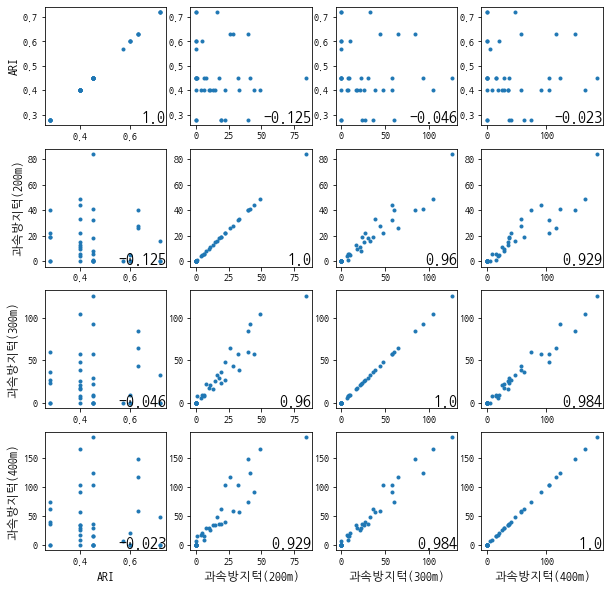

In [ ]:
feature = ['ARI', '과속방지턱(200m)', '과속방지턱(300m)', '과속방지턱(400m)']
show_scatter(sacc_zone, feature)

In [ ]:
center = [37.541, 126.986]  # 지도의 중심 좌표,여기 예는 서울시 좌표입니다. 
seoul_map = folium.Map(location=center,
                       tiles='cartodbpositron',
                       zoom_start=11, # seoul_map변수 지정, 서울시, 화면 해상도는 11
                       control_scale=True)


fg = folium.FeatureGroup(name='스쿨존 내 사고다발 지역')
seoul_map.add_child(fg)

fgg = folium.FeatureGroup(name='스쿨존 개수')
seoul_map.add_child(fgg)

fggg = folium.FeatureGroup(name='불법주정차 개수')
seoul_map.add_child(fggg)

fgggg = folium.FeatureGroup(name='과속방지턱 개수')
seoul_map.add_child(fgggg)

for i in sacc_zone.index:
  folium.Circle(
      location =[sacc_zone['위도'][i], sacc_zone['경도'][i]],
      radius = 300,
      color = 'yellow',
      fill_color = 'yellow',
      fill_opacity = 100,
).add_to(fg)

for i in szone.index:
  folium.Circle(
      location =[szone['위도'][i], szone['경도'][i]],
      radius = 5,
      color = 'blue',
      fill_color = 'blue',
      fill_opacity = 100,
).add_to(fgg) 

for i in illegal_parking.index:
  folium.Circle(
      location =[illegal_parking['위도'][i], illegal_parking['경도'][i]],
      radius = 5,
      color = 'red',
      fill_color = 'red',
      fill_opacity = 100,
).add_to(fggg) 

for i in speed_bump.index:
  folium.Circle(
      location =[speed_bump['위도'][i], speed_bump['경도'][i]],
      radius = 5,
      color = 'green',
      fill_color = 'green',
      fill_opacity = 100,
).add_to(fgggg) 

folium.LayerControl().add_to(seoul_map)

seoul_map

In [ ]:
# 스쿨존 내 스쿨존 사고다발지역 개수
szone_ver2['스쿨존(200m)'] = sacc_zone_count(szone_ver2, sacc_zone, 0.2)
szone_ver2['스쿨존(300m)'] = sacc_zone_count(szone_ver2, sacc_zone, 0.3)
szone_ver2['스쿨존(400m)'] = sacc_zone_count(szone_ver2, sacc_zone, 0.4)
szone_ver2['스쿨존(500m)'] = sacc_zone_count(szone_ver2, sacc_zone, 0.5)

# 스쿨존 내 사고 다발지역 개수
szone_ver2['스쿨존(200m)'] = sacc_zone_count(szone_ver2, acc_zone, 0.2)
szone_ver2['스쿨존(300m)'] = sacc_zone_count(szone_ver2, acc_zone, 0.3)
szone_ver2['스쿨존(400m)'] = sacc_zone_count(szone_ver2, acc_zone, 0.4)
szone_ver2['스쿨존(500m)'] = sacc_zone_count(szone_ver2, acc_zone, 0.5)

# 스쿨존 내 불법주정차 위반 단속 개수
szone_ver2['불법주정차(200m)'] = sacc_zone_count(szone_ver2, illegal_parking, 0.2)
szone_ver2['불법주정차(300m)'] = sacc_zone_count(szone_ver2, illegal_parking, 0.3)
szone_ver2['불법주정차(400m)'] = sacc_zone_count(szone_ver2, illegal_parking, 0.4)
szone_ver2['불법주정차(500m)'] = sacc_zone_count(szone_ver2, illegal_parking, 0.5)

# 스쿨존 내 과속방지턱 개수
szone_ver2['과속방지턱(200m)'] = sacc_zone_count(szone_ver2, speed_bump, 0.2)
szone_ver2['과속방지턱(300m)'] = sacc_zone_count(szone_ver2, speed_bump, 0.3)
szone_ver2['과속방지턱(400m)'] = sacc_zone_count(szone_ver2, speed_bump, 0.4)
szone_ver2['과속방지턱5400m)'] = sacc_zone_count(szone_ver2, speed_bump, 0.5)

In [ ]:
szone_ver2.columns

Index(['index', '행정구역', '시설종류', '대상시설명', '위도', '경도', 'CARI', 'CARI300',
       'CARI200', 'CARI400', 'CARI500', '불법주정차200', '불법주정차300', '불법주정차400',
       '불법주정차500', '과속방지턱200', '스쿨존(200m)', '스쿨존(300m)', '스쿨존(400m)',
       '스쿨존(500m)', '불법주정차(200m)', '불법주정차(300m)', '불법주정차(400m)', '불법주정차(500m)',
       '과속방지턱(200m)', '과속방지턱(300m)', '과속방지턱(400m)', '과속방지턱5400m)'],
      dtype='object')

In [ ]:
print('CARI 값 개수: ', len(szone_ver2['CARI300'].unique()))
print('과속방지턱(200m) 값 개수: ', len(szone_ver2['과속방지턱(200m)'].unique()))
print('과속방지턱(300m) 값 개수: ', len(szone_ver2['과속방지턱(300m)'].unique()))
print('과속방지턱(400m) 값 개수: ', len(szone_ver2['과속방지턱(400m)'].unique()))
print('불법주정차(200m) 값 개수: ', len(szone_ver2['불법주정차(200m)'].unique()))
print('불법주정차(300m) 값 개수: ', len(szone_ver2['불법주정차(300m)'].unique()))
print('불법주정차(400m) 값 개수: ', len(szone_ver2['불법주정차(400m)'].unique()))
print('스쿨존내사고(200m) 값 개수: ', len(szone_ver2['스쿨존(200m)'].unique()))
print('스쿨존내사고(300m) 값 개수: ', len(szone_ver2['스쿨존(300m)'].unique()))
print('스쿨존내사고(400m) 값 개수: ', len(szone_ver2['스쿨존(400m)'].unique()))

CARI 값 개수:  94
과속방지턱(200m) 값 개수:  79
과속방지턱(300m) 값 개수:  130
과속방지턱(400m) 값 개수:  180
불법주정차(200m) 값 개수:  10
불법주정차(300m) 값 개수:  16
불법주정차(400m) 값 개수:  24
스쿨존내사고(200m) 값 개수:  3
스쿨존내사고(300m) 값 개수:  3
스쿨존내사고(400m) 값 개수:  4


In [ ]:
szone['CARI'].unique()

In [ ]:
feature = ['CARI300', '스쿨존(200m)', '과속방지턱(200m)', '불법주정차(200m)']
show_scatter(szone_ver2, feature)

In [ ]:
acc_zone.head(2)

,지점코드,연도,행정구역,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,위도,경도,다발지역폴리곤,ARI
법정동코드,,,,,,,,,,,,,,
1117012900,11170001,2016,용산구,"서울특별시 용산구 이촌동(이촌1동 주민선터, 용산청소년수 부근)",3,4,0,0,2,2,37.521424,126.973010,"{""type"":""Polygon"",""coordinates"":[[[126.9748069...",0.60
1123010600,11230001,2016,동대문구,서울특별시 동대문구 장안동(승용빌딩 부근),3,3,0,1,1,1,37.566494,127.068121,"{""type"":""Polygon"",""coordinates"":[[[127.0699180...",0.63


In [ ]:
import seaborn as sns
plt.figure( figsize=(20, 5) )
sns.barplot( data=acc_zone, x='연도', y='사상자수', hue='행정구역' )
plt.legend(bbox_to_anchor = (1,1))
plt.show()

NameError: ignored

In [ ]:
new_aczone = aczone.groupby(by=['행정구역', '연도'])['발생건수'].sum()
new_aczone=pd.DataFrame(new_aczone)
new_aczone.reset_index(inplace=True)

In [ ]:
rawData = acc_zone.reset_index()
rawData.head(2)

,법정동코드,지점코드,연도,행정구역,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,위도,경도,다발지역폴리곤,ARI
0,1117012900,11170001,2016,용산구,"서울특별시 용산구 이촌동(이촌1동 주민선터, 용산청소년수 부근)",3,4,0,0,2,2,37.521424,126.973010,"{""type"":""Polygon"",""coordinates"":[[[126.9748069...",0.60
1,1123010600,11230001,2016,동대문구,서울특별시 동대문구 장안동(승용빌딩 부근),3,3,0,1,1,1,37.566494,127.068121,"{""type"":""Polygon"",""coordinates"":[[[127.0699180...",0.63


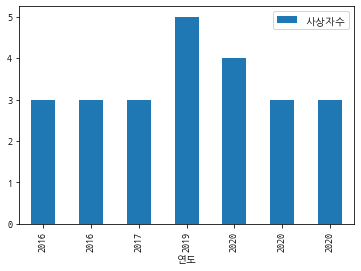

In [ ]:
rawData[ rawData['행정구역'] == '강서구'].plot( kind='bar', x='연도', y='사상자수')

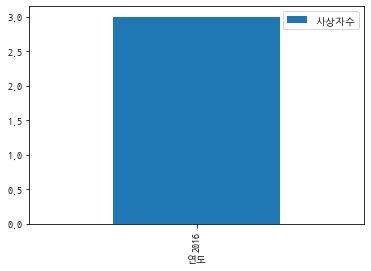

In [ ]:
rawData[ rawData['행정구역'] == '금천구'].plot( kind='bar', x='연도', y='사상자수')

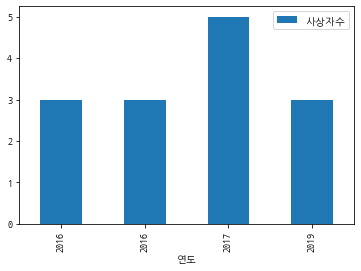

In [ ]:
rawData[ rawData['행정구역'] == '영등포구'].plot( kind='bar', x='연도', y='사상자수')

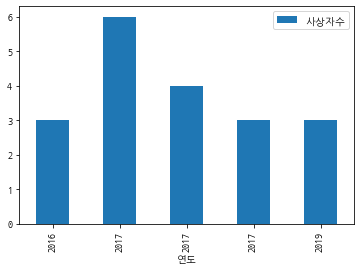

In [ ]:
rawData[ rawData['행정구역'] == '동작구'].plot( kind='bar', x='연도', y='사상자수')

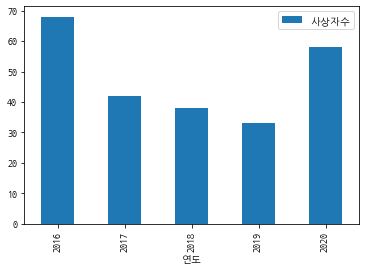

In [ ]:
pd.pivot_table(data=acc_zone, values='사상자수', index='연도', aggfunc=sum).plot(kind='bar')

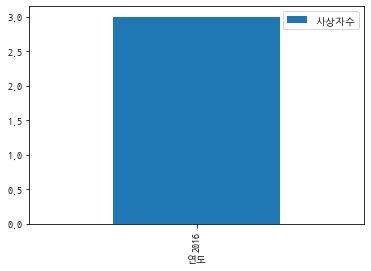

In [ ]:
rawData[ rawData['행정구역'] == '동대문구'].plot( kind='bar', x='연도', y='사상자수')